In [1]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q

!pip install opendatasets -q

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: thakshakarathnayake
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification


100%|██████████| 217M/217M [00:00<00:00, 641MB/s]


In [4]:
BATCH_SIZE = 32
IMAGE_SIZE = (128,128)

In [6]:
train_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/train"
test_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/test"

In [8]:
train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='training',
                                                         validation_split=0.1,
                                                         seed=42)

validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='validation',
                                                         validation_split=0.1,
                                                         seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE)

Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 2000 files belonging to 2 classes.


In [9]:
class_names = train_data.class_names
class_names

['cats', 'dogs']

In [12]:
for image_batch, label_batch in train_data.take(1):
    print(image_batch.shape)
    print(label_batch.shape)

(32, 128, 128, 3)
(32,)


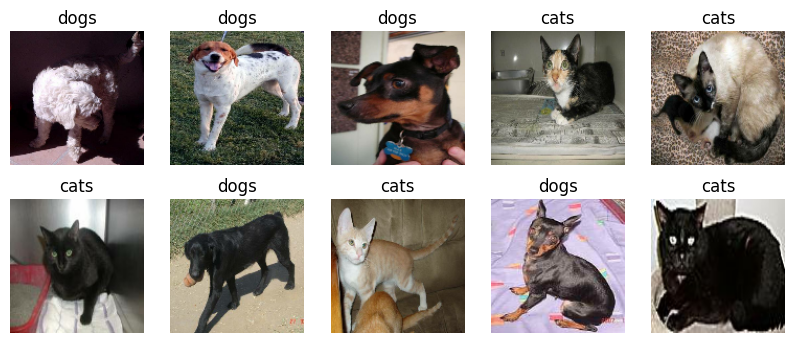

In [14]:
plt.figure(figsize=(10,4))
for image, label in train_data.take(1):
    for i in range(10):
        ax = plt.subplot(2,5,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        plt.axis('off')

# Data Preprocessing

## Scaling Images (Normalization)

In [15]:
for image,label in train_data.take(1):
    for i in range(1):
      print(image)

tf.Tensor(
[[[[ 85.07135    95.16901   118.6026   ]
   [ 73.450806   51.834015   96.53674  ]
   [ 77.49155    41.6745     96.203766 ]
   ...
   [141.32031   101.359375   84.67969  ]
   [139.01562   101.97656    85.97656  ]
   [136.        103.         86.       ]]

  [[ 91.555084  108.553894  115.95703  ]
   [ 86.658966   74.99762   104.00662  ]
   [ 74.58209    42.252106   91.69345  ]
   ...
   [140.66797   103.02734    85.34766  ]
   [141.31522   105.62143    88.58389  ]
   [139.30469   106.30469    88.609375 ]]

  [[ 94.50064   113.828766  114.16342  ]
   [ 93.45697    98.646454  109.95505  ]
   [ 79.53265    62.58133    97.458435 ]
   ...
   [140.50781   104.         85.75391  ]
   [138.49615   106.47272    85.48834  ]
   [139.        107.         85.50781  ]]

  ...

  [[207.2461    194.2461    188.2461   ]
   [207.7539    195.7539    183.73828  ]
   [206.67508   194.67508   180.67508  ]
   ...
   [206.48898   199.48898   191.48898  ]
   [206.29501   201.27939   195.27554  ]
   [2

In [16]:
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

In [17]:
for image,label in train_data.take(1):
    for i in range(1):
      print(image)

tf.Tensor(
[[[[0.26377553 0.21301365 0.11813726]
   [0.5353891  0.38347432 0.20359987]
   [0.5515419  0.38676974 0.19257022]
   ...
   [0.67971814 0.58952206 0.3934436 ]
   [0.6745098  0.58431375 0.3882353 ]
   [0.66332316 0.57312703 0.37704864]]

  [[0.23344655 0.18925542 0.15019915]
   [0.48180148 0.34551165 0.20767464]
   [0.5208326  0.37555075 0.18625896]
   ...
   [0.6862745  0.59607846 0.4       ]
   [0.67977345 0.5895774  0.39349893]
   [0.6684283  0.5782322  0.3821538 ]]

  [[0.22841606 0.19784008 0.19708419]
   [0.3618566  0.26410797 0.1702663 ]
   [0.44014892 0.315451   0.15907294]
   ...
   [0.6901961  0.6        0.40392157]
   [0.68235296 0.5921569  0.39607844]
   [0.66525733 0.57506126 0.37898284]]

  ...

  [[0.7563417  0.70143974 0.5092828 ]
   [0.7183206  0.66341865 0.47126177]
   [0.73020285 0.6753009  0.48314402]
   ...
   [0.4885723  0.440625   0.2917794 ]
   [0.52421874 0.47069523 0.32435638]
   [0.5433364  0.492356   0.3220641 ]]

  [[0.7295343  0.6746324  0.482530

## Data Augmentation

In [19]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
  ]
)

# Model Building

In [20]:
model = tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,325,825 (12.69 MB)

 Trainable params: 3,325,569 (12.69 MB)

 Non-trainable params: 256 (1.00 KB)

## Compile Model

In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

# Model Training

In [23]:
start_time = time.time()

epoch_number = 20

history = model.fit(train_data,
                    epochs=epoch_number,
                    validation_data=validation_data)

end_time = time.time()

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.5641 - loss: 0.7002 - val_accuracy: 0.5063 - val_loss: 0.7147
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.6013 - loss: 0.6560 - val_accuracy: 0.6175 - val_loss: 0.6842
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.6447 - loss: 0.6265 - val_accuracy: 0.6300 - val_loss: 0.6487
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.6758 - loss: 0.5975 - val_accuracy: 0.5962 - val_loss: 0.7882
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6820 - loss: 0.5895 - val_accuracy: 0.5750 - val_loss: 1.2754
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.6846 - loss: 0.5883 - val_accuracy: 0.7100 - val_loss: 0.5796
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.6865 - loss: 0.5781 - val_accuracy: 0.7200 - val_loss: 0.5598
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.7049 - loss: 0.5629 - val_ac

In [25]:
print(f'Total time for training {(end_time-start_time):.3f} seconds')

Total time for training 182.639 seconds


In [26]:
history.history

{'accuracy': [0.5866666436195374,
  0.625,
  0.6604166626930237,
  0.680138885974884,
  0.6855555772781372,
  0.6937500238418579,
  0.6938889026641846,
  0.7140277624130249,
  0.7200000286102295,
  0.7295833230018616,
  0.7351388931274414,
  0.738194465637207,
  0.7551388740539551,
  0.7547222375869751,
  0.7595833539962769,
  0.7776389122009277,
  0.7765277624130249,
  0.7822222113609314,
  0.7836111187934875,
  0.7865277528762817],
 'loss': [0.6778940558433533,
  0.642300546169281,
  0.6156898140907288,
  0.5912572741508484,
  0.5875961184501648,
  0.5837785005569458,
  0.5707017183303833,
  0.5521320104598999,
  0.5491968393325806,
  0.5361009836196899,
  0.5201816558837891,
  0.5224143862724304,
  0.5021441578865051,
  0.5035673975944519,
  0.4931023120880127,
  0.4713759422302246,
  0.4675597846508026,
  0.4564800262451172,
  0.4490077495574951,
  0.4443677067756653],
 'val_accuracy': [0.5062500238418579,
  0.6175000071525574,
  0.6299999952316284,
  0.5962499976158142,
  0.574999

# Performance Analysis

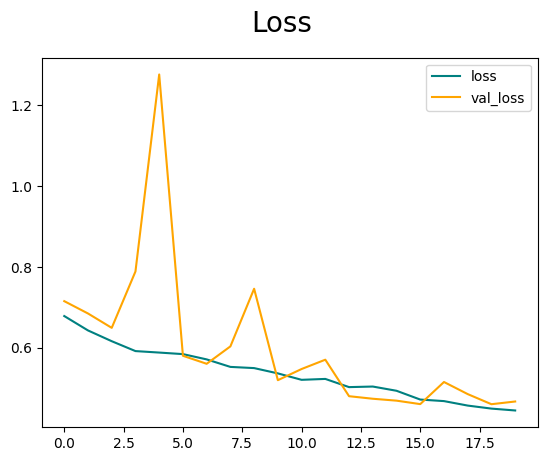

In [27]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

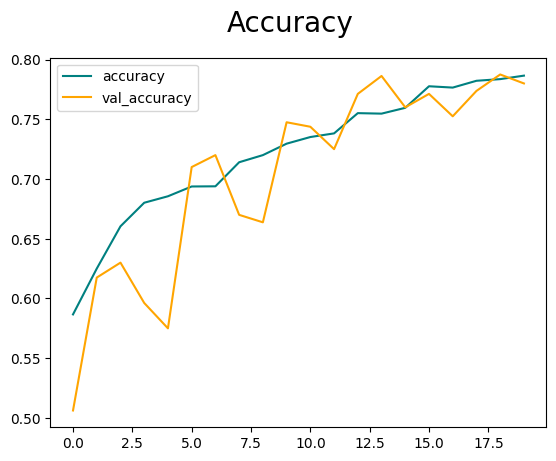

In [28]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

# Model Evaluation

In [29]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [30]:
for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━

In [31]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.7211538553237915>

In [32]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.8999999761581421>

In [33]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.7760000228881836>

# Prediction Pipeline

In [34]:
!pip install opencv-python -q

In [35]:
import cv2

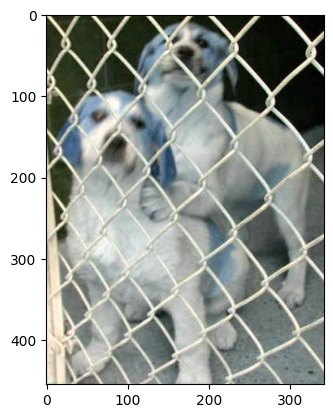

In [36]:
img = cv2.imread('/content/cats-and-dogs-for-classification/cats_dogs/test/dogs/dog.4008.jpg')
plt.imshow(img)
plt.show()

In [37]:
resized_image = tf.image.resize(img, IMAGE_SIZE)
scaled_image = resized_image/255

In [38]:
scaled_image.shape

TensorShape([128, 128, 3])

In [39]:
np.expand_dims(scaled_image, 0).shape

(1, 128, 128, 3)

In [40]:
yhat = model.predict(np.expand_dims(scaled_image, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


In [41]:
yhat

array([[0.99403596]], dtype=float32)

In [42]:
class_names

['cats', 'dogs']

In [44]:
if yhat >= 0.5:
    print(f'{class_names[1]}')
else:
    print(f'{class_names[0]}')

dogs
